<a href="https://colab.research.google.com/github/JoumanaMaki/Generative-adversarial-networks/blob/main/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GANs - Generative adversarial network

## Loading the libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

## Load and pre-processing the dataset

In [2]:
(X_train, y_train), (_,_) = tf.keras.datasets.mnist.load_data() # no need for test images

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
28*28

784

In [5]:
y_train.shape

(60000,)

2


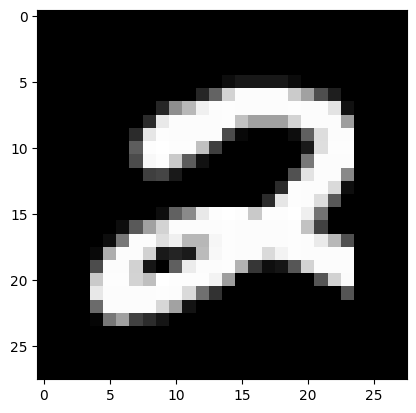

In [9]:
i = np.random.randint(0,60000)
print(y_train[i])
plt.imshow(X_train[i], cmap='gray')

In [10]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') # 1 because grayscale images
X_train.shape # now we have the correct format to send it to the NN

(60000, 28, 28, 1)

In [11]:
X_train[0].min(), X_train[0].max()

(0.0, 255.0)

In [12]:
#now we need to normalize the data to have better results in a short time
X_train = (X_train - 127.5) / 127.5 #from -1 to 1

In [13]:
X_train[0].min(), X_train[0].max()

(-1.0, 1.0)

In [14]:
buffer_size = 60000
batch_size = 256

In [16]:
type(X_train) # need to convert this data to tensorflow format

numpy.ndarray

In [17]:
X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

In [18]:
type(X_train)

tensorflow.python.data.ops.batch_op._BatchDataset

In [19]:
X_train

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

## Build the generator

In [27]:
def build_generator():
  network = tf.keras.Sequential()


  network.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  network.add(layers.Reshape((7, 7, 256)))

  network.add(layers.Conv2DTranspose(128, (5, 5), padding='same', use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())


  network.add(layers.Conv2DTranspose(64, (5, 5),strides=(2,2), padding='same', use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())


  network.add(layers.Conv2DTranspose(1, (5, 5),strides=(2,2), padding='same', use_bias=False, activation='tanh'))

  network.summary()

  return network



In [28]:
generator = build_generator()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 12544)               │       1,254,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12544)               │          50,176 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 7, 7, 128)           │         819,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 14, 14, 64)          │         204,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 28, 28, 1)           │           1,600 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,330,944 (8.89 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

In [29]:
noise = tf.random.normal([1, 100])


In [30]:
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 0.10801162, -1.0690303 , -0.22284392,  0.6983547 ,  0.42059422,
         0.2879475 , -0.9676254 ,  0.5833694 ,  0.64321625,  1.3512232 ,
        -1.1786777 , -0.76160854,  0.49022734,  0.25123942, -0.34837255,
        -1.8778809 ,  0.5647634 , -0.04425266, -1.0615835 , -0.24320781,
         0.62441695,  0.9432815 ,  0.38589498,  1.5592716 , -0.6633786 ,
         1.6064472 ,  0.22032125, -1.3894393 ,  0.7253915 ,  1.643483  ,
         1.6866593 ,  0.8222619 ,  0.5158689 ,  0.02346871, -0.12532794,
        -0.46237245, -0.96972245, -2.1073122 ,  0.03729115,  0.11520663,
        -0.22670229, -0.0536215 , -1.2759001 , -0.48823404, -0.21632522,
        -0.59898025,  2.0095515 , -0.49931642,  1.0040718 ,  1.5111876 ,
        -1.8655999 ,  0.17766619, -0.5940271 ,  1.1985157 ,  0.97529614,
        -1.5055387 ,  2.1618228 ,  0.85485804,  0.30447796,  0.33492997,
         1.1320611 ,  1.0292094 , -1.1857144 ,  1.6680754 ,  1.6289394 ,
 

In [31]:
generated_image = generator(noise, training=False) # no need to train and adjust weights

In [32]:
generated_image

<tf.Tensor: shape=(1, 28, 28, 1), dtype=float32, numpy=
array([[[[ 1.28401458e-04],
         [-2.55539618e-03],
         [ 2.52308254e-03],
         [ 9.25912813e-04],
         [-6.13389583e-03],
         [-9.41395201e-03],
         [-1.38555386e-03],
         [ 1.23235388e-02],
         [ 2.15164828e-03],
         [-1.16283186e-02],
         [-1.82330201e-03],
         [ 1.43131008e-04],
         [-5.49463206e-04],
         [-1.78912822e-02],
         [-4.29527508e-03],
         [ 5.37791569e-03],
         [ 4.80773719e-03],
         [-1.21165067e-04],
         [-3.62375914e-03],
         [ 1.34553397e-02],
         [ 1.99341238e-03],
         [ 4.25510667e-03],
         [-5.46242017e-03],
         [-1.06861698e-03],
         [-6.78323163e-03],
         [-1.14544705e-02],
         [-2.06490420e-03],
         [-5.19824820e-03]],

        [[ 4.86448221e-03],
         [-1.85470365e-03],
         [-9.73357633e-03],
         [-2.25176048e-02],
         [-2.14703870e-03],
         [-1.39062

In [33]:
generated_image.shape

TensorShape([1, 28, 28, 1])

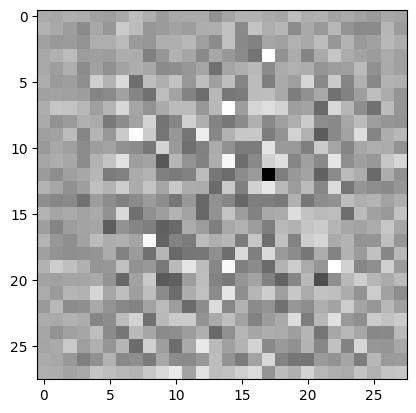

In [34]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

## Build the discriminator

In [35]:
def build_discriminator():
  network = tf.keras.Sequential()

  network.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))


  network.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  network.add(layers.Flatten())
  network.add(layers.Dense(1))

  network.summary()

  return network


In [36]:
discriminator = build_discriminator()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           6,273 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
discriminator(generated_image, training = False)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00212577]], dtype=float32)>

## Calculating the loss

In [40]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [42]:
def discriminator_loss(expected_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(expected_output), expected_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

In [43]:
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [44]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00001)

## Training GAN

In [45]:
X_train

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

In [47]:
epochs = 100
noise_dim = 100
num_examples_to_generate = 16

In [58]:
@tf.function
def train_steps(images):
  noise = tf.random.normal([batch_size,noise_dim])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(noise, training=True)

    expected_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(expected_output, fake_output)

  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [59]:
test_images = tf.random.normal([num_examples_to_generate, noise_dim])

In [60]:
test_images.shape

TensorShape([16, 100])

In [61]:
def train(dataset, epochs, test_images):
  for epoch in range(epochs):
    for image_batch in dataset:
      #print(image_batch.shape)
      train_steps(image_batch)

    print('Epoch: ', epoch + 1)
    generated_images = generator(test_images, training = False)
    fig = plt.figure(figsize=(10,10))
    for i in range(generated_images.shape[0]):
      plt.subplot(4,4,i+1)
      plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')
    plt.show()

Epoch:  1


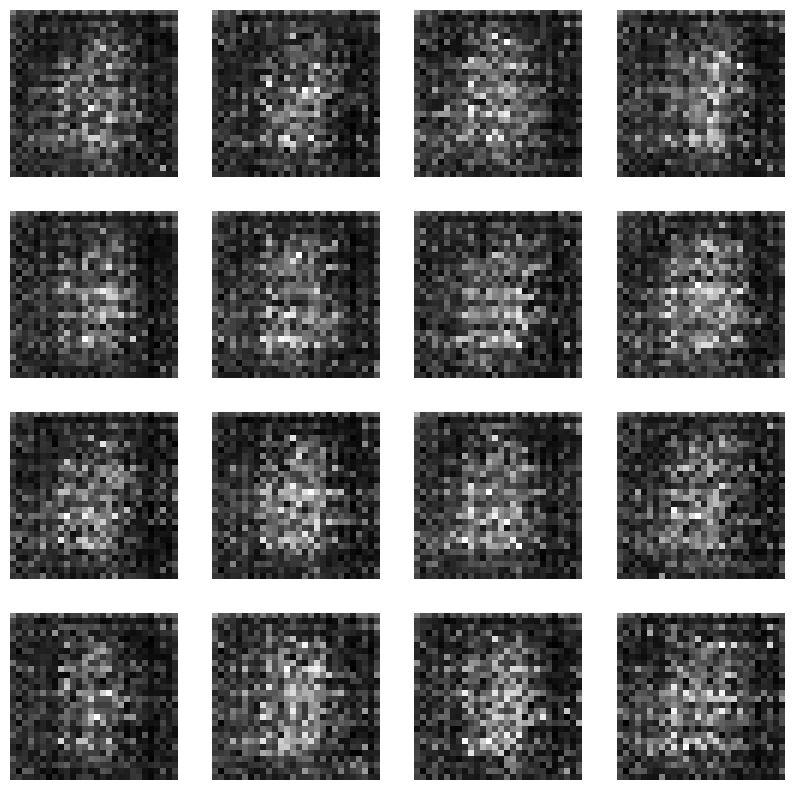

Epoch:  2


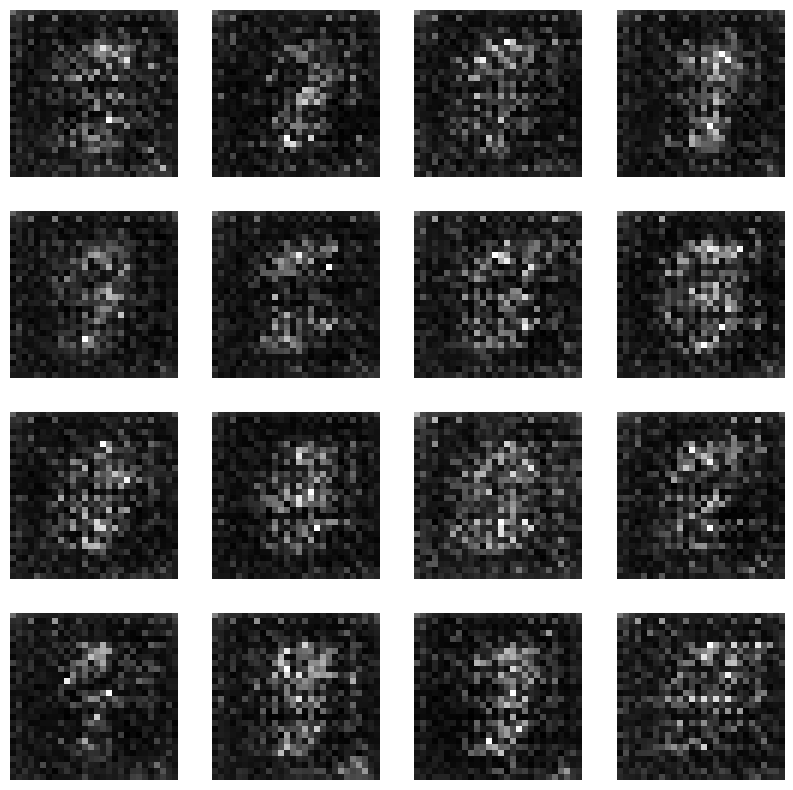

Epoch:  3


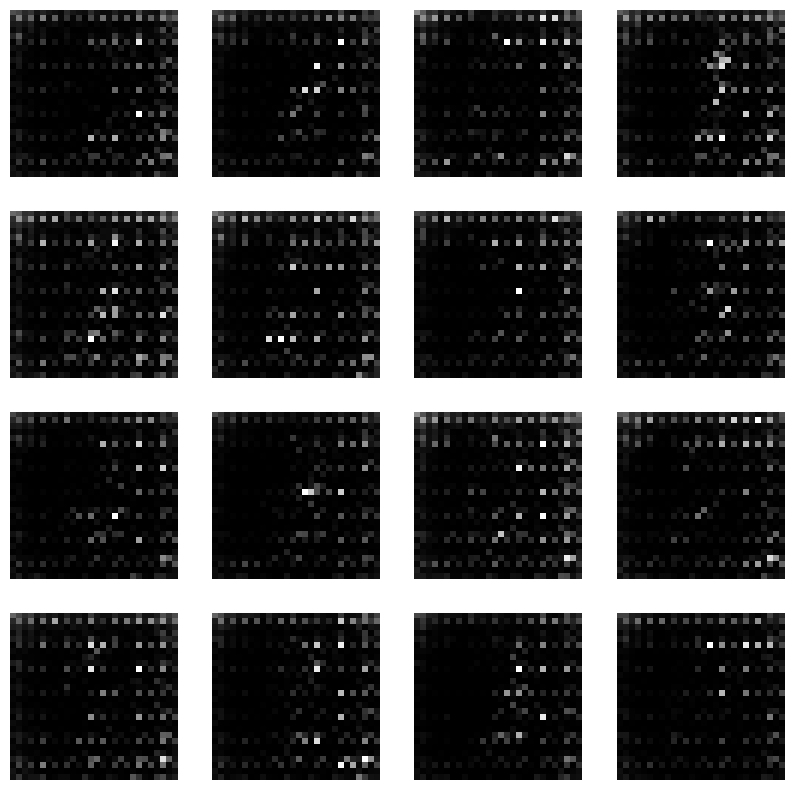

Epoch:  4


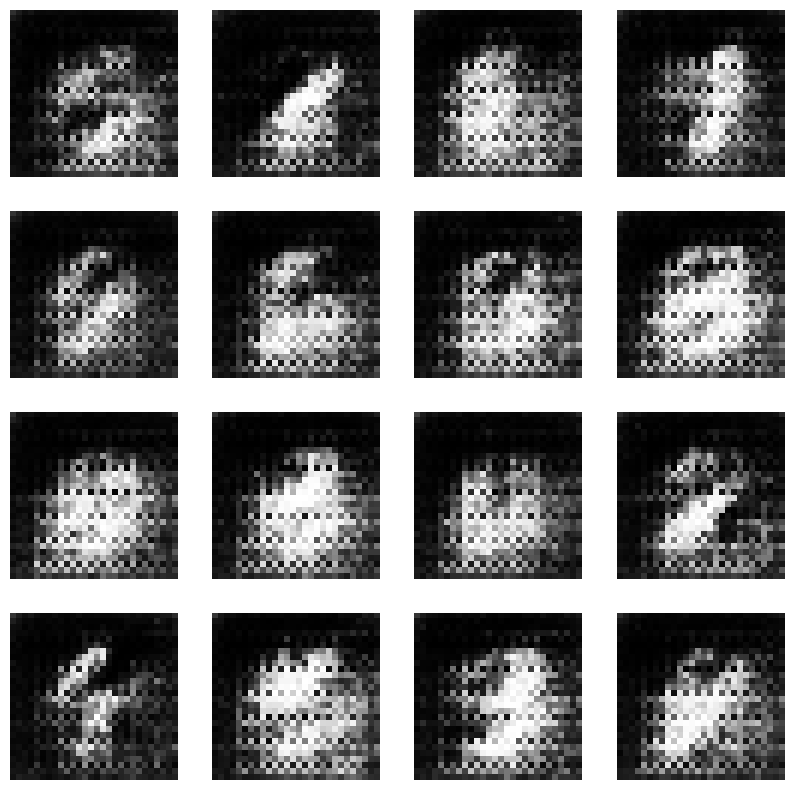

Epoch:  5


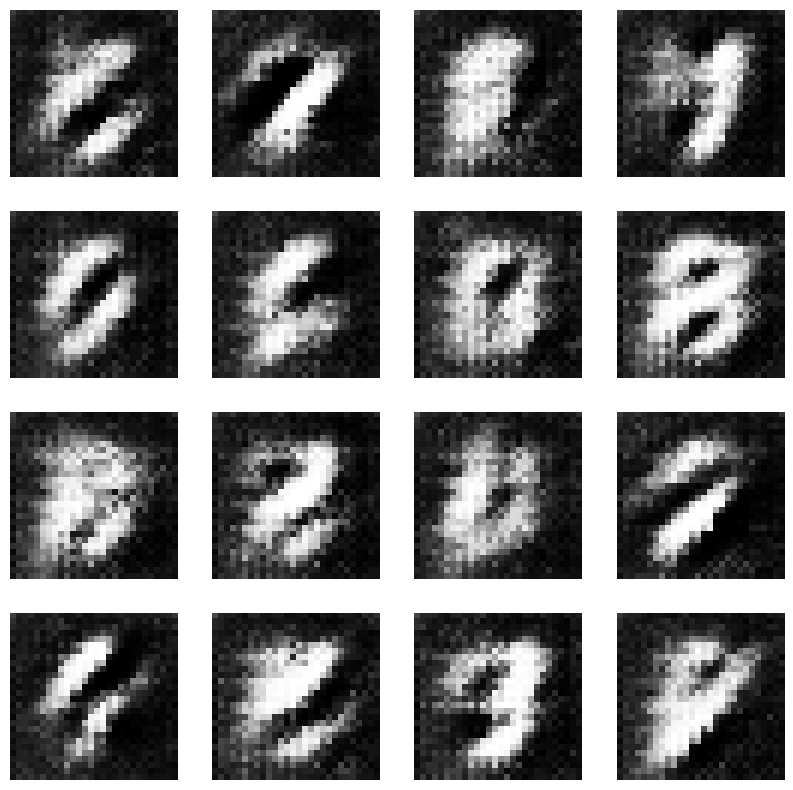

Epoch:  6


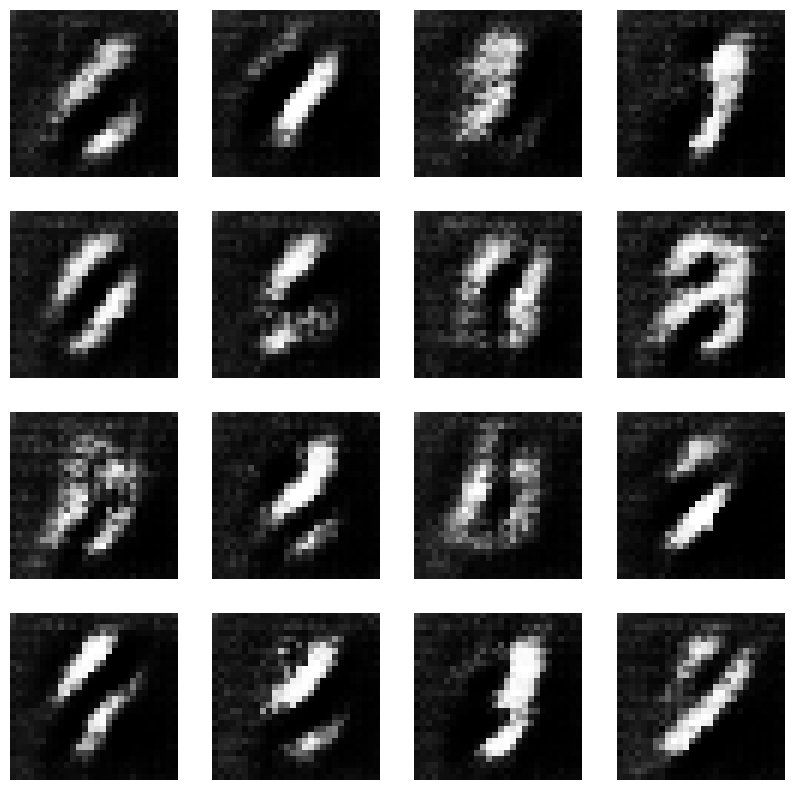

Epoch:  7


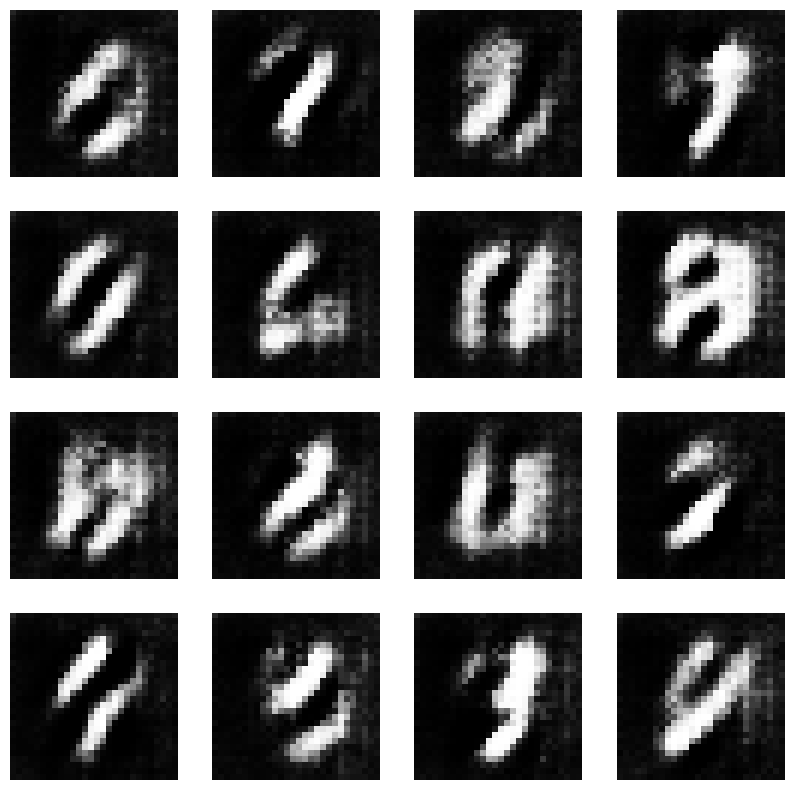

Epoch:  8


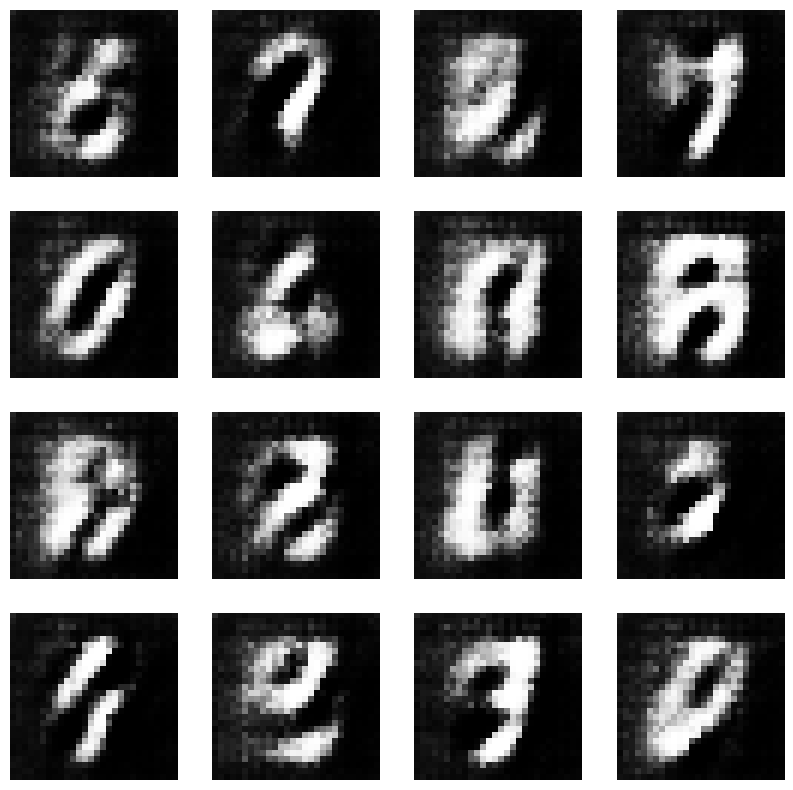

Epoch:  9


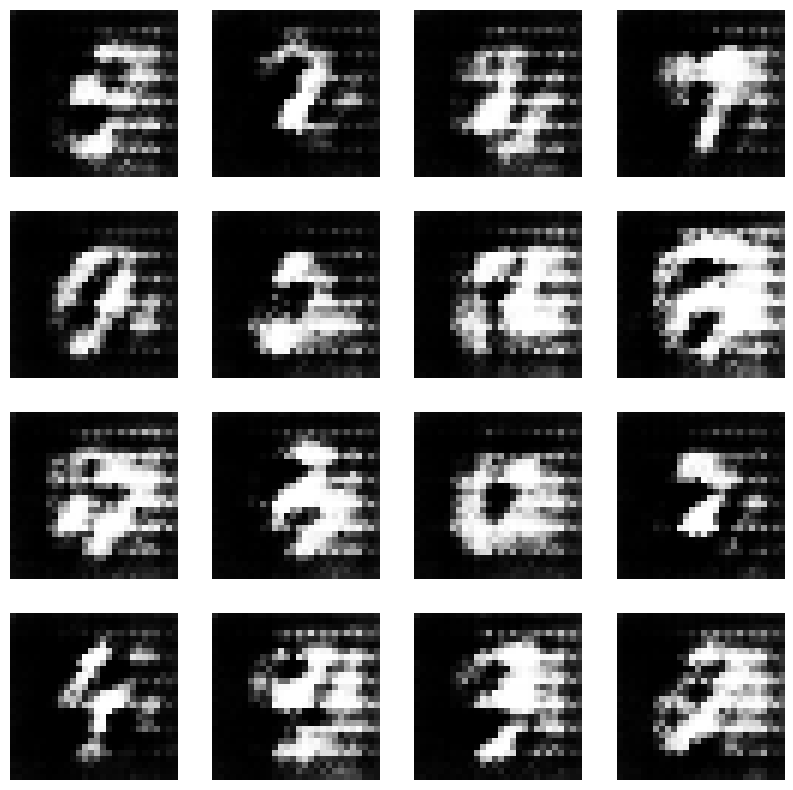

Epoch:  10


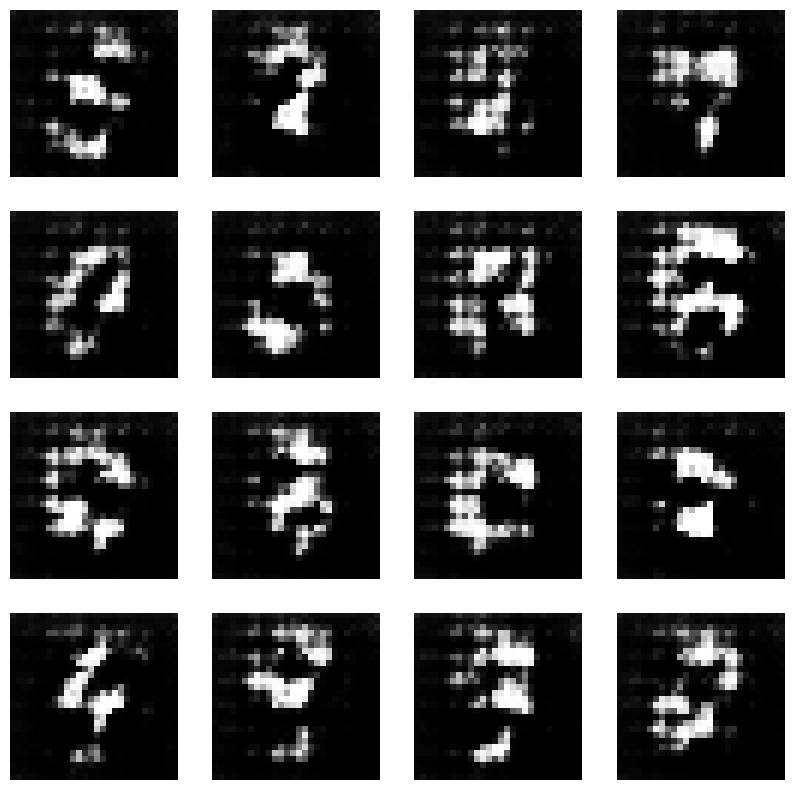

Epoch:  11


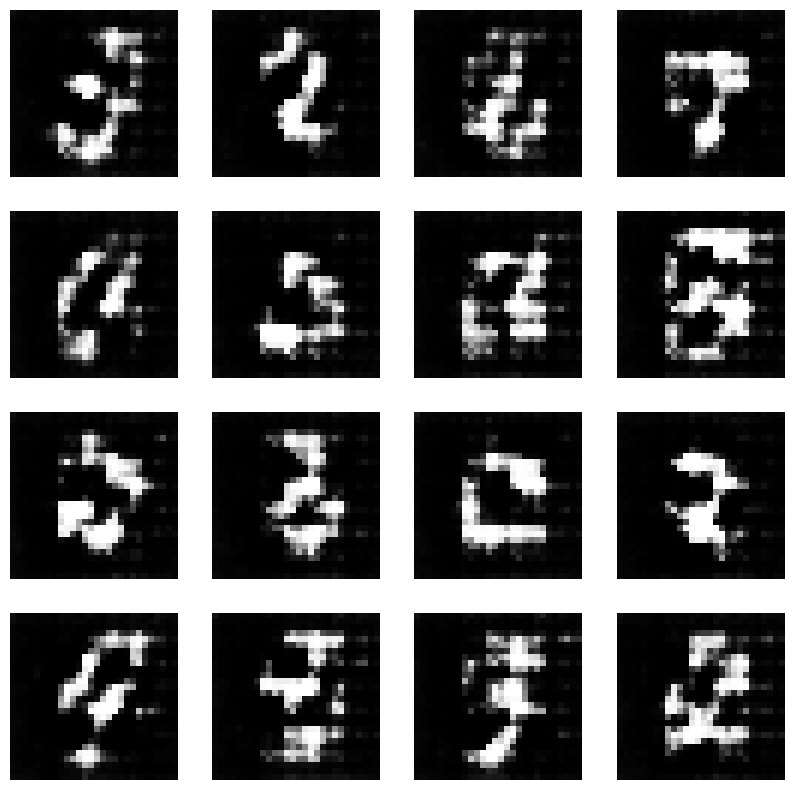

Epoch:  12


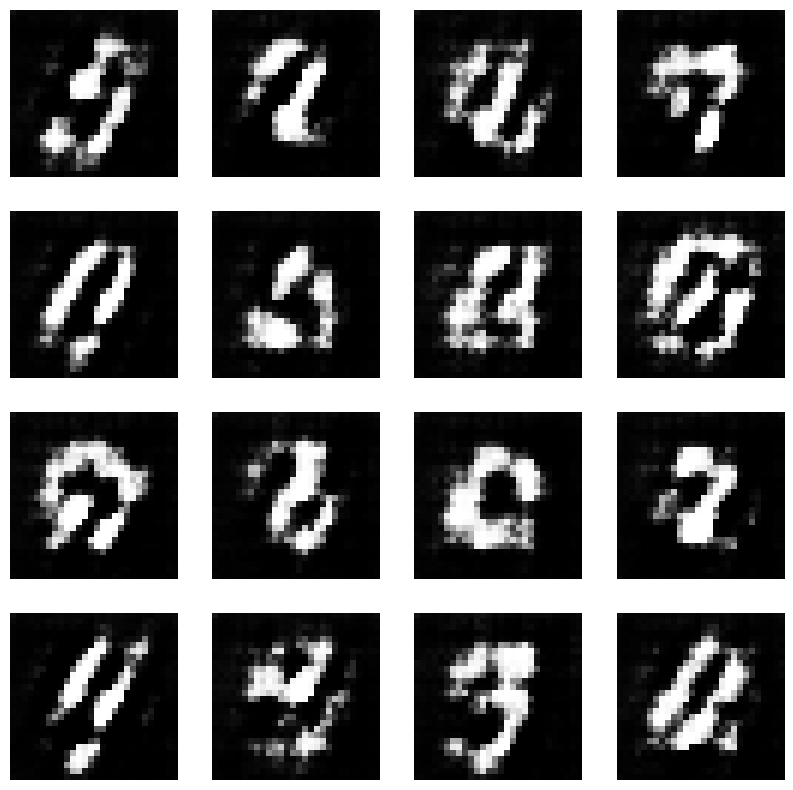

Epoch:  13


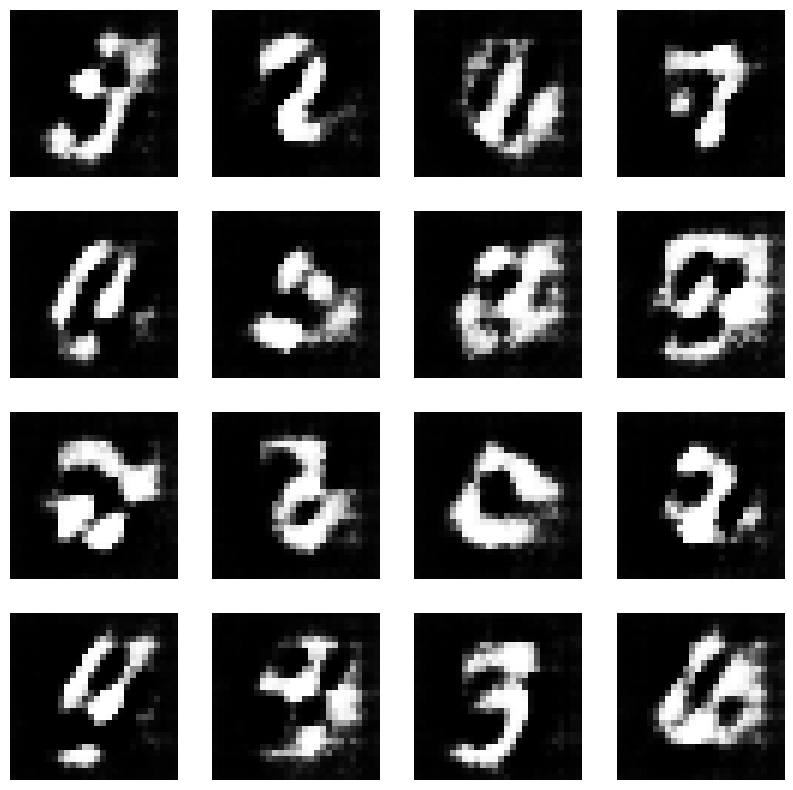

Epoch:  14


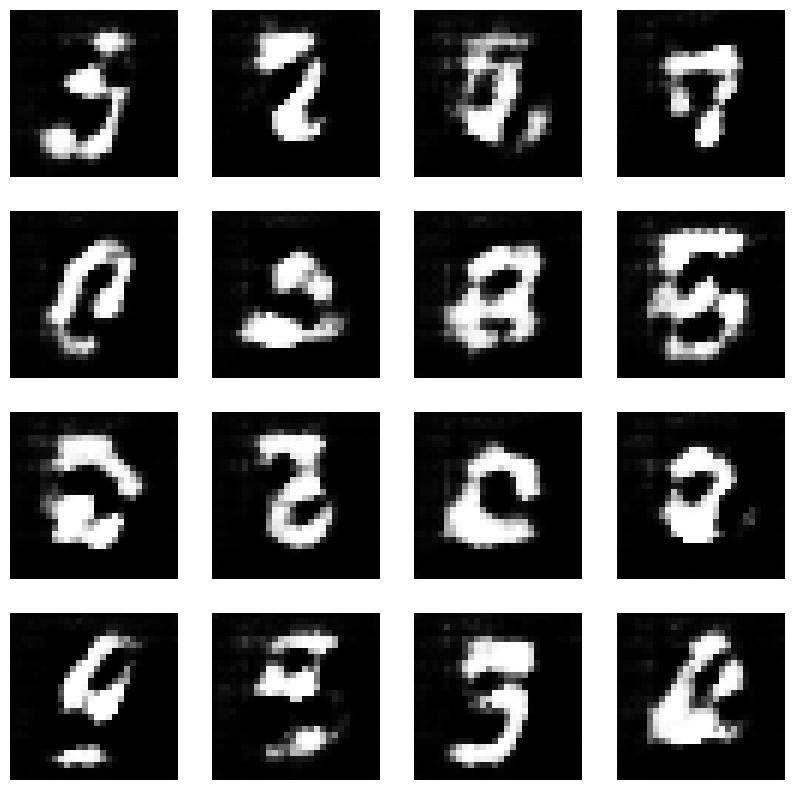

Epoch:  15


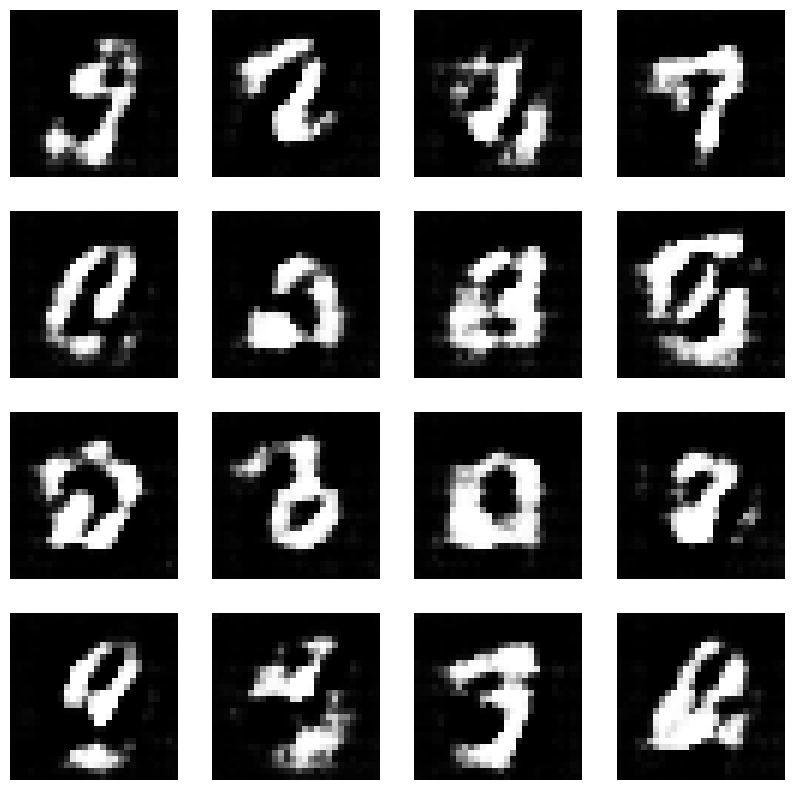

Epoch:  16


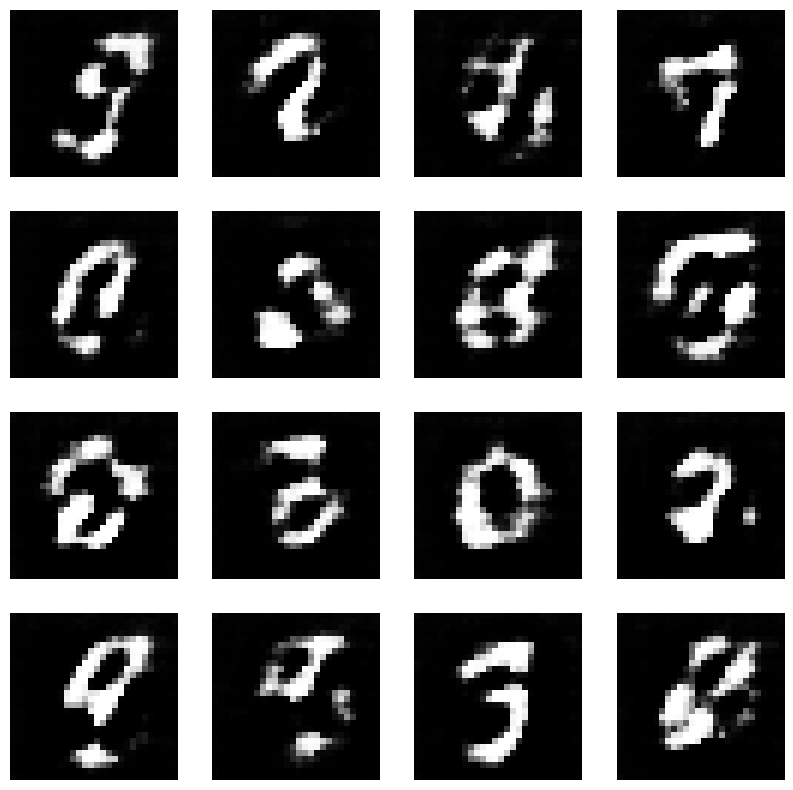

In [ ]:
train(X_train, epochs, test_images)